In [1]:
# import statements

import pandas as pd

In [2]:
# Extract data from CSV file

df = pd.read_csv('../data/country_vaccinations.csv')
df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [3]:
# Explore Data

print('The data frame has: \n -{} rows and {} columns.'.format(df.shape[0], df.shape[1]))
print(' -{} duplicates.'.format(len(df[df.duplicated()])))
print(' -{} countries.'.format(df['country'].nunique()))

print('\nThe list of columns with the number of missing values:\n\n', df.isnull().sum())

The data frame has: 
 -2916 rows and 15 columns.
 -0 duplicates.
 -85 countries.

The list of columns with the number of missing values:

 country                                   0
iso_code                                240
date                                      0
total_vaccinations                     1048
people_vaccinated                      1386
people_fully_vaccinated                1978
daily_vaccinations_raw                 1377
daily_vaccinations                      115
total_vaccinations_per_hundred         1048
people_vaccinated_per_hundred          1386
people_fully_vaccinated_per_hundred    1978
daily_vaccinations_per_million          115
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64


In [12]:
# Count NaN values

df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                      915
people_vaccinated                      1242
people_fully_vaccinated                1822
daily_vaccinations_raw                 1207
daily_vaccinations                      109
total_vaccinations_per_hundred          915
people_vaccinated_per_hundred          1242
people_fully_vaccinated_per_hundred    1822
daily_vaccinations_per_million          109
vaccines                                  0
source_name                               0
dtype: int64

In [4]:
# Explore Countries

print(*df['country'].unique().tolist(), sep='\n')

Albania
Algeria
Andorra
Argentina
Austria
Bahrain
Bangladesh
Belgium
Bermuda
Bolivia
Brazil
Bulgaria
Canada
Cayman Islands
Chile
China
Costa Rica
Croatia
Cyprus
Czechia
Denmark
Ecuador
Egypt
England
Estonia
Faeroe Islands
Finland
France
Germany
Gibraltar
Greece
Greenland
Guernsey
Hungary
Iceland
India
Indonesia
Iran
Ireland
Isle of Man
Israel
Italy
Jersey
Kuwait
Latvia
Liechtenstein
Lithuania
Luxembourg
Maldives
Malta
Mauritius
Mexico
Monaco
Morocco
Myanmar
Nepal
Netherlands
Northern Cyprus
Northern Ireland
Norway
Oman
Panama
Peru
Poland
Portugal
Qatar
Romania
Russia
Saint Helena
Saudi Arabia
Scotland
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Spain
Sri Lanka
Sweden
Switzerland
Turkey
United Arab Emirates
United Kingdom
United States
Wales


## Countries Questions

1. Does 'Northern Cyprus' include data that should be added to 'Cyprus' data? Or is it duplicate data that should be removed?

2. Do 'England', 'Ireland', 'Northern Ireland', 'Scotland', and 'Wales' include data that should be added to 'United Kingdom' data? Or is it duplicate data that should be removed?

## Countries Assumptions

For simplicity, we are going to assume that the aforementioned rows are duplicates. Therefore, we are going to remove (drop) them.

In [5]:
# Transform Data
#   Clean Data
#      Clean Countries

"""
Drop

   England
   Ireland
   Northern Ireland
   Scotland
   Wales

Since they are part of the United Kingdom

Drop

   Northern Cyprus
   
Since it is part of the Cyprus

"""
countries_to_del = ['England', 'Ireland' , 'Northern Ireland', 'Scotland', 'Wales', 'Northern Cyprus']

for country_name in countries_to_del:
    df.drop(df[df['country'] == country_name].index, inplace=True)

print(*df['country'].unique().tolist(), sep='\n')

Albania
Algeria
Andorra
Argentina
Austria
Bahrain
Bangladesh
Belgium
Bermuda
Bolivia
Brazil
Bulgaria
Canada
Cayman Islands
Chile
China
Costa Rica
Croatia
Cyprus
Czechia
Denmark
Ecuador
Egypt
Estonia
Faeroe Islands
Finland
France
Germany
Gibraltar
Greece
Greenland
Guernsey
Hungary
Iceland
India
Indonesia
Iran
Isle of Man
Israel
Italy
Jersey
Kuwait
Latvia
Liechtenstein
Lithuania
Luxembourg
Maldives
Malta
Mauritius
Mexico
Monaco
Morocco
Myanmar
Nepal
Netherlands
Norway
Oman
Panama
Peru
Poland
Portugal
Qatar
Romania
Russia
Saint Helena
Saudi Arabia
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Spain
Sri Lanka
Sweden
Switzerland
Turkey
United Arab Emirates
United Kingdom
United States


In [6]:
print('Number of countries after cleaning is: {} countries.'.format(df['country'].nunique()))

Number of countries after cleaning is: 79 countries.


## Vaccination Assumptions

There are multiple columns that describe vaccinations:

- total_vaccinations
- people_vaccinated	
- people_fully_vaccinated
- daily_vaccinations_raw
- daily_vaccinations
- total_vaccinations_per_hundred
- people_vaccinated_per_hundred	
- people_fully_vaccinated_per_hundred	
- daily_vaccinations_per_million	

We will create a smaller dataset containing: 

- country
- data
- daily_vaccintations
- vaccines

The reason for choosing 'daily_vaccinations' is that this column has the minimum number of NaN values.

## Questions to answer with visualization:

1. What vaccines are used and in which countries?
2. What country is vaccinated more people?
3. What country is vaccinated a larger percent from its population?


In [13]:
# Transform Data
#   Clean Data
#      Create a small Dataset

covid_df = df[['country', 'date', 'daily_vaccinations', 'vaccines']]

In [14]:
# Number of vaccinations in each country

covid_df.groupby(['country'])['daily_vaccinations'].sum()

country
Albania                     1071.0
Algeria                       30.0
Andorra                      828.0
Argentina                 546060.0
Austria                   290357.0
Bahrain                   181706.0
Bangladesh                106580.0
Belgium                   467371.0
Bermuda                     9675.0
Bolivia                     7964.0
Brazil                   3731231.0
Bulgaria                   64366.0
Canada                    840599.0
Cayman Islands             13379.0
Chile                     953053.0
China                   34922496.0
Costa Rica                 68319.0
Croatia                    92710.0
Cyprus                     27285.0
Czechia                   383182.0
Denmark                   348019.0
Ecuador                     5683.0
Egypt                       1314.0
Estonia                    56118.0
Faeroe Islands              1062.0
Finland                   224691.0
France                   2192402.0
Germany                  3412985.0
Gibraltar   

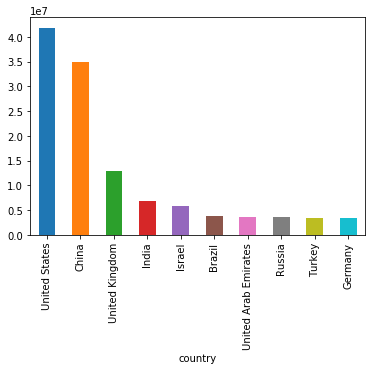

In [16]:
# Visualization

covid_df.groupby(['country'])['daily_vaccinations'].sum().nlargest(10).plot(kind='bar');

In [18]:
# Number of vaccinations by vaccine company

covid_df.groupby(['vaccines'])['daily_vaccinations'].sum()

vaccines
Covaxin, Oxford/AstraZeneca                                                            6816157.0
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          15896380.0
Moderna, Pfizer/BioNTech                                                              49666666.0
Oxford/AstraZeneca                                                                      585413.0
Oxford/AstraZeneca, Pfizer/BioNTech                                                   13504689.0
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V     3710275.0
Oxford/AstraZeneca, Sinopharm/Beijing                                                   773479.0
Oxford/AstraZeneca, Sinovac                                                            3731231.0
Pfizer/BioNTech                                                                        2409929.0
Pfizer/BioNTech, Sinopharm/Beijing                                                      181706.0
Pfizer/BioNTech, Sino

## Vaccines Assumptions

As we can see above there are multiple rows with values for 2 or more vaccines. Therefore, we will keep the rows containing one vaccine type only for simplicity reasons. The rows to keep are:

- Oxford/AstraZeneca
- Pfizer/BioNTech
- Sinopharm/Beijing
- Sinovac
- Sputnik V

Moderna will be lost since we don't have exact numbers for this vaccine.

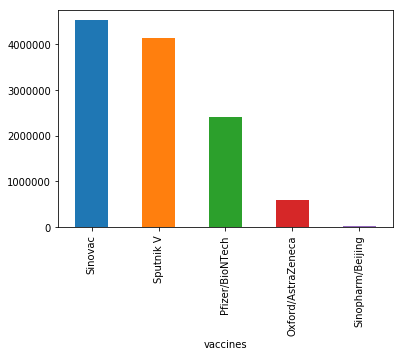

In [25]:
# Visualization

covid_df.loc[(df['vaccines'] == 'Oxford/AstraZeneca') | (df['vaccines'] == 'Pfizer/BioNTech') | (df['vaccines'] == 'Sinopharm/Beijing') | (df['vaccines'] == 'Sinovac') | (df['vaccines'] == 'Sputnik V')].groupby(['vaccines'])['daily_vaccinations'].sum().nlargest().plot(kind='bar');